In [1]:
from data.data_prep import DataPrep
from pipelines.preprocessing import get_preprocess_pipeline

In [2]:
data_prep = DataPrep(dataset="cfb")
raw_data = data_prep.get_data()

print("Step 2: Preprocess and separate odds, X, and y...")
preprocessed_data = get_preprocess_pipeline().fit_transform(raw_data)
target_col = "home_away_spread"
betting_cols = ["min_spread", "max_spread"]
all_betting_cols = ["min_ou", "max_ou", "min_spread", "max_spread"]

odds_df = preprocessed_data[[target_col] + betting_cols]
odds_df.loc[:, "pred"] = None
X = preprocessed_data.drop(columns=[target_col] + all_betting_cols)
y = preprocessed_data[target_col]

Step 2: Preprocess and separate odds, X, and y...


c:\Users\brtnl\OneDrive\Desktop\code\sports_betting\src\cfb\pipelines\preprocessing.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_.replace(self.null_values, self.impute_val, inplace=True)
C:\Users\brtnl\AppData\Local\Temp\ipykernel_22640\2826584560.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds_df.loc[:, "pred"] = None


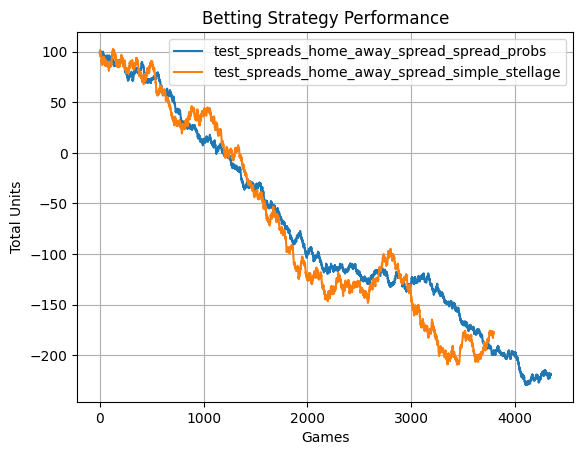

,Mean Average Error,Mean Squared Error,R-Squared,Sharpe,Net PNL,Max Drawdown,Number of Bets,Winning Bet %
model,,,,,,,,
test_spreads_home_away_spread_spread_probs,15.669494,395.84378,0.338447,-3.318814,-319.15,-329.12,4349,0.495516
test_spreads_home_away_spread_simple_stellage,15.669494,395.84378,0.338447,-2.847408,-278.01,-309.17,3800,0.504737


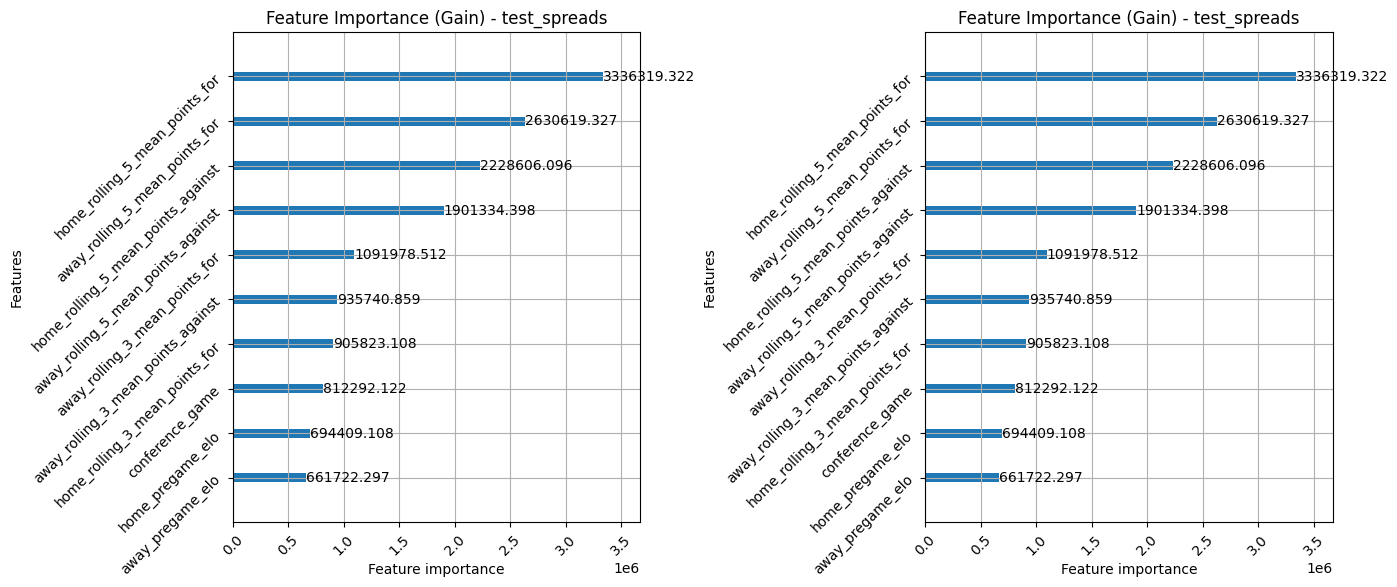

In [19]:
from evaluation import compare_models
from strategy import betting_logic

compare_models("test_spreads", "test_spreads", "home_away_spread", ("spread_probs", "simple_stellage"))


In [14]:
from evaluation import load_pkl_if_exists
from strategy import betting_logic

s = load_pkl_if_exists("test_spreads", "home_away_spread", betting_fnc="spread_probs", file_type="odds_df")
d = load_pkl_if_exists("test_spreads", "home_away_spread", betting_fnc="simple_stellage", file_type="odds_df")

In [20]:
s

,home_away_spread,min_spread,max_spread,pred,cover_min_prob,cover_max_prob,unit_pnl
id,,,,,,,
332412309,-7.0,2.0,2.0,None,NaN,NaN,NaN
332412579,-17.0,-11.5,-11.0,None,NaN,NaN,NaN
332410154,-24.0,-30.0,-30.0,None,NaN,NaN,NaN
332412710,-33.0,NaN,NaN,None,NaN,NaN,NaN
332410084,-38.0,-30.5,-30.5,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...
401741208,-16.0,NaN,NaN,-6.584085,NaN,NaN,NaN
401680057,3.0,-6.5,-4.0,-5.711143,0.543837,0.000000,NaN
401677189,3.0,-1.5,-1.0,6.696833,0.370679,0.000000,0.87


In [ ]:
# Probs of 0 --> so far out?
s[(s["unit_pnl"] < 0)]

,home_away_spread,min_spread,max_spread,pred,cover_min_prob,cover_max_prob,unit_pnl
id,,,,,,,
401013357,-48.0,-21.0,-21.0,-10.596837,0.000000,0.000000,-1.0
401020671,-36.0,-19.5,-19.5,-13.135015,0.427314,0.427314,-1.0
401019470,39.0,22.5,24.0,8.608353,0.851106,0.000000,-1.0
401013328,-38.0,-21.5,-21.5,-10.60309,0.323775,0.323775,-1.0
401014979,-52.0,-39.0,-39.0,-13.123038,0.000000,0.000000,-1.0
...,...,...,...,...,...,...,...
401677101,-3.0,-2.5,-1.0,5.386918,0.384699,0.000000,-1.0
401677102,-6.0,16.5,16.5,21.463125,0.418115,0.418115,-1.0
401677105,-32.0,-17.5,-14.5,-9.619232,0.385229,0.451589,-1.0


In [5]:
from strategy.betting_logic import BettingLogic

In [6]:
bl = BettingLogic()

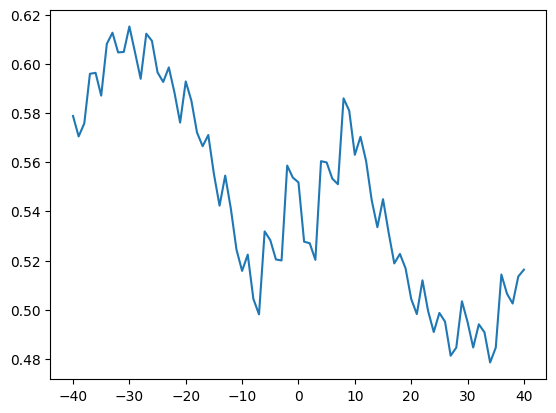

In [8]:
import matplotlib.pyplot as plt
plt.plot(bl.spread_cover_probs)

In [4]:
# Do these numbers look right?
s

,home_away_spread,min_spread,max_spread,pred,pred_wt_cover_prob,min_wt_cover_prob,max_wt_cover_prob,unit_pnl
id,,,,,,,,
332412309,-7.0,2.0,2.0,None,NaN,0.527023,0.527023,NaN
332412579,-17.0,-11.5,-11.0,None,NaN,0.532815,0.524457,NaN
332410154,-24.0,-30.0,-30.0,None,NaN,0.615322,0.615322,NaN
332412710,-33.0,NaN,NaN,None,NaN,NaN,NaN,NaN
332410084,-38.0,-30.5,-30.5,None,NaN,0.610130,0.610130,NaN
...,...,...,...,...,...,...,...,...
401741208,-16.0,NaN,NaN,-6.584085,0.512113,NaN,NaN,NaN
401680057,3.0,-6.5,-4.0,-5.711143,0.530823,0.514954,0.520427,NaN
401677189,3.0,-1.5,-1.0,6.696833,0.551768,0.556223,0.553770,NaN


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# s.dropna(inplace=True)
mean_absolute_error(s["home_away_spread"], s["pred"])

ValueError: Input contains NaN.

In [60]:
(s["home_away_spread"] != d["home_away_spread"]).sum()

np.int64(0)

In [68]:
s["pred"].isna().sum()

np.int64(7756)

In [69]:
d["pred"].isna().sum()

np.int64(7756)

In [49]:
d.dropna(inplace=True)
mean_absolute_error(d["home_away_spread"], d["pred"])

np.float64(14.222999024779599)

In [50]:
temp[temp["pred_x"] != temp["pred_y"]][["pred_x", "pred_y"]]

,pred_x,pred_y
id,,


In [53]:
s["home_away_spread"]

id
401013357   -48.0
401014972    -3.0
401020671   -36.0
401019470    39.0
401013328   -38.0
             ... 
401677176   -14.0
401677091    -8.0
401677092   -13.0
401677105   -32.0
401677106    -2.0
Name: home_away_spread, Length: 1477, dtype: float64

In [54]:
d["home_away_spread"]

id
401013357   -48.0
401014972    -3.0
401022510     9.0
401013437    22.0
401020671   -36.0
             ... 
401677108    19.0
401680057     3.0
401677189     3.0
401677191    14.0
401677192    11.0
Name: home_away_spread, Length: 7627, dtype: float64

In [45]:
temp[temp["diff"].isna()]

,home_away_spread_x,min_spread_x,max_spread_x,pred_x,pred_wt_cover_prob,min_wt_cover_prob,max_wt_cover_prob,unit_pnl_x,home_away_spread_y,min_spread_y,max_spread_y,pred_y,unit_pnl_y,diff
id,,,,,,,,,,,,,,


In [43]:
import pandas as pd
temp = pd.merge(s, d, on="id")

In [44]:
temp["diff"] = temp["pred_x"] - temp["pred_y"]
temp["diff"].unique()

array([0.0], dtype=object)

In [ ]:
def normalize_line(row):
    line_team, line_value = row['line_string'].split(' ')
    line_value = float(line_value)

    if line_team == row['home_team']:
        return line_value
    elif line_team == row['away_team']:
        return -line_value
    else:
        return None  # error handling or unknown case

df['home_line'] = df.apply(normalize_line, axis=1)

KeyError: 'line_string'

In [ ]:
# Random arxiv betting strategy
"""
N~ Rand(0, 22)
Historical probability of point spreads (I Guess I can do this myself)
120x80
"""


In [3]:
from data.data_prep import DataPrep

In [35]:
from db_utils import retrieve_data
import matplotlib.pyplot as plt

s = retrieve_data("cfb", 'games')

In [36]:
# s = s[s["season"] == 2021]
s["home_away_spread"] = s["away_points"] - s["home_points"]

In [37]:
col = s[s["home_away_spread"].abs() <= 60]["home_away_spread"]
hist_pcts = col.value_counts().sort_index()/len(col)

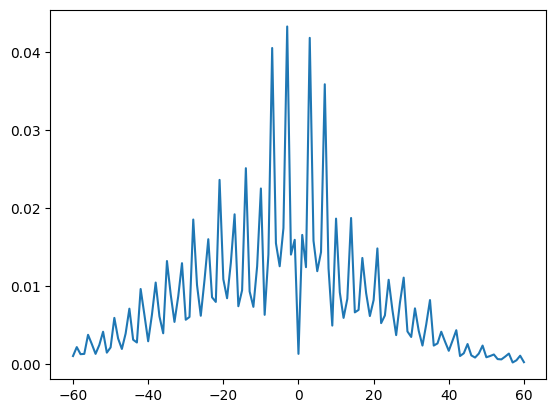

In [38]:
plt.plot(hist_pcts)

In [57]:
hist_pcts

home_away_spread
-60.0    0.000986
-59.0    0.002129
-58.0    0.001222
-57.0    0.001261
-56.0    0.003706
           ...   
 56.0    0.001301
 57.0    0.000158
 58.0    0.000434
 59.0    0.001025
 60.0    0.000197
Name: count, Length: 121, dtype: float64

In [ ]:
from scipy.stats import norm
import numpy as np
import pandas as pd

# Parameters for the normal distribution
mu = 0       # mean
sigma = 15   # standard deviation

# Integer range
x_vals = np.arange(-60, 61)

# Compute probability mass for each bin (x - 0.5 to x + 0.5)
probs = norm.cdf(x_vals + 0.5, loc=mu, scale=sigma) - norm.cdf(x_vals - 0.5, loc=mu, scale=sigma)
prob_series = pd.Series(probs, index=x_vals, name="norm")

In [61]:
s = pd.concat([hist_pcts, prob_series], axis=1)
s["mult"] = s["count"] / s["norm"]

In [65]:
s

,count,norm,mult
-60.0,0.000986,0.000009,110.154570
-59.0,0.002129,0.000012,182.663590
-58.0,0.001222,0.000015,80.862120
-57.0,0.001261,0.000020,64.652913
-56.0,0.003706,0.000025,147.757708
...,...,...,...
56.0,0.001301,0.000025,51.872387
57.0,0.000158,0.000020,8.081614
58.0,0.000434,0.000015,28.693010
59.0,0.001025,0.000012,87.949136


In [108]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Parameters
sigma = 15   # standard deviation

# Indices for rows (-60 to 60) and columns (-40 to 40)
rows = np.arange(-60, 61)  # Rows are indices from -60 to 60
cols = np.arange(-40, 41)  # Columns are from -40 to 40

# Create an empty DataFrame with the correct shape
df = pd.DataFrame(index=rows, columns=cols)

# Populate each cell with the CDF for the range (-0.5, 0.5), (-1.5, -0.5), etc.
for row in rows:
    for col in cols:
        mu = col
        lower_bound = row - 0.5
        upper_bound = row + 0.5
        # Mu is the row, not centered at 0
        cdf_value = norm.cdf(upper_bound, loc=mu, scale=sigma) - norm.cdf(lower_bound, loc=mu, scale=sigma)
        df.loc[row, col] = cdf_value


In [110]:
df2 = df.mul(s["mult"], axis=0)
df2.head()

,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
-60,1.204604,1.09974,0.999553,0.904467,0.814798,0.730765,0.652493,0.580022,0.513315,0.452265,0.39671,0.346437,0.301193,0.260698,0.224647,0.192723,0.164602,0.139962,0.118482,0.099855,0.083783,0.069986,0.058202,0.048187,0.039719,0.032594,0.026629,0.021658,0.017538,0.014138,0.011347,0.009067,0.007212,0.005712,0.004504,0.003535,0.002763,0.002149,0.001665,0.001284,0.000986,0.000753,0.000573,0.000434,0.000327,0.000246,0.000184,0.000137,0.000101,0.000075,0.000055,0.00004,0.000029,0.000021,0.000015,0.000011,0.000008,0.000006,0.000004,0.000003,0.000002,0.000001,0.000001,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-59,2.178305,1.997532,1.823641,1.657507,1.49983,1.351137,1.211789,1.081995,0.96182,0.851203,0.749968,0.657844,0.574479,0.499454,0.432302,0.37252,0.319582,0.272951,0.232091,0.196473,0.165584,0.138933,0.116054,0.096513,0.079907,0.065864,0.054049,0.044157,0.035915,0.029082,0.023445,0.018816,0.015035,0.01196,0.009472,0.007468,0.005862,0.004581,0.003564,0.002761,0.002129,0.001634,0.001249,0.00095,0.00072,0.000543,0.000408,0.000305,0.000227,0.000168,0.000124,0.000091,0.000067,0.000048,0.000035,0.000025,0.000018,0.000013,0.000009,0.000007,0.000005,0.000003,0.000002,0.000002,0.000001,0.000001,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-58,1.046905,0.964299,0.884274,0.807295,0.733751,0.66395,0.598126,0.536439,0.478981,0.425782,0.376813,0.331998,0.291217,0.254312,0.2211,0.191373,0.164908,0.141474,0.120831,0.102743,0.086975,0.073301,0.061503,0.051375,0.042725,0.035373,0.029157,0.023927,0.019547,0.015899,0.012874,0.010379,0.00833,0.006656,0.005294,0.004193,0.003306,0.002595,0.002028,0.001578,0.001222,0.000942,0.000723,0.000553,0.000421,0.000319,0.00024,0.00018,0.000135,0.0001,0.000074,0.000055,0.00004,0.000029,0.000021,0.000016,0.000011,0.000008,0.000006,0.000004,0.000003,0.000002,0.000001,0.000001,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-57,0.904724,0.837048,0.771001,0.707017,0.645469,0.586667,0.530858,0.478228,0.428907,0.382967,0.340432,0.301279,0.265448,0.232841,0.203334,0.176779,0.153011,0.131852,0.113114,0.09661,0.082148,0.069541,0.058608,0.049175,0.041077,0.03416,0.028283,0.023312,0.01913,0.015629,0.012712,0.010293,0.008298,0.00666,0.005321,0.004233,0.003352,0.002643,0.002075,0.001621,0.001261,0.000977,0.000753,0.000578,0.000442,0.000336,0.000255,0.000192,0.000144,0.000108,0.00008,0.000059,0.000044,0.000032,0.000024,0.000017,0.000012,0.000009,0.000006,0.000005,0.000003,0.000002,0.000002,0.000001,0.000001,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-56,2.224922,2.067656,1.912988,1.762044,1.615816,1.475155,1.340768,1.213222,1.092943,0.980223,0.875232,0.778022,0.688543,0.606654,0.532134,0.464699,0.404011,0.349691,0.301333,0.258512,0.220792,0.18774,0.158928,0.133942,0.112383,0.093877,0.07807,0.064637,0.053278,0.043721,0.035719,0.029052,0.023525,0.018965,0.015221,0.012162,0.009674,0.007662,0.006041,0.004742,0.003706,0.002883,0.002233,0.001722,0.001322,0.00101,0.000769,0.000582,0.000439,0.00033,0.000247,0.000183,0.000136,0.0001,0.000074,0.000054,0.000039,0.000028,0.00002,0.000015,0.000011,0.000007,0.000005,0.000004,0.000003,0.000002,0.000001,0.000001,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
for col in df2:
    df2[col] = df2[col]/(df2[col].sum())

In [128]:
cover_probs = df2.apply(lambda col: col[col.index <= col.name].sum(), axis=0)
# So if my pred is 3.8, i want to take the weighted sum of 3, 4, and compare that 
cover_probs[3] * 0.5 + cover_probs[-2] * 0.5

np.float64(0.5906543084601719)

In [127]:
cover_probs[-3]

np.float64(0.6676163371052563)

In [ ]:

pd.set_option('display.max_rows', None)  # No limit for rows
pd.set_option('display.max_columns', None)  # No limit for columns
pd.set_option('display.width', None)  # To prevent wrapping of columns

,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
-60,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144,0.074144
-59,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295,0.12295
-58,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428,0.054428
-57,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518,0.043518
-56,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455,0.099455


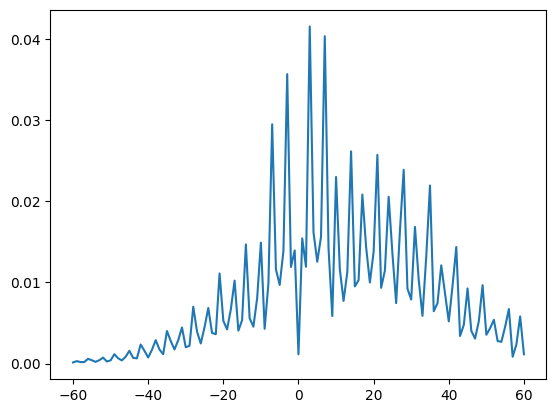

In [119]:
# Conditional on the point spread, the SD 
plt.plot(df2[7])

In [1]:
import argparse
import datetime as dt
import importlib
import os
import warnings

import joblib
import numpy as np
import pandas as pd
from data.data_prep import DataPrep
from pipelines.pipeline import get_features_and_model_pipeline
from pipelines.preprocessing import get_preprocess_pipeline
from sklearn.model_selection import BaseCrossValidator
from sklearn.pipeline import Pipeline
from strategy.betting_logic import BettingLogic

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=pd.errors.SettingWithCopyWarning)

PROJECT_ROOT = os.getenv("PROJECT_ROOT", os.getcwd())
